In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#creating dataframes
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

#taking a first look at the species_info df
print(species_info.info())
print(species_info.shape)
print(species_info.head())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
(5824, 4)
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), D

In [72]:
#dropping the 'common names' column, as it's obsolete for our purposes (we'll use the scientific name only)
species_info = species_info.drop('common_names', axis=1)
#looks like there are more entries than there are unique scientific names in the df, implying duplicates
print(species_info.shape)
print(len(species_info.scientific_name.unique()))


(5824, 3)
5541


In [73]:
#dropping duplicates
species_info.drop_duplicates(keep='first', inplace=True)

#filling in nans
species_info['conservation_status'] = species_info['conservation_status'].fillna('no info')

#creating categorical data out of conservation status
species_info["conservation_status"] = species_info["conservation_status"].astype("category")
species_info["conservation_status"].cat.reorder_categories(['Endangered', 'Threatened', 'Species of Concern', 'In Recovery', 'no info'], ordered=True)
species_info.sort_values(by='conservation_status', inplace=True, ascending=True)

#now that the data is sorted by conservation status, we can drop duplicates from the scientific_name column and leave the highest available conservation status
species_info.drop_duplicates(subset='scientific_name', keep='first', inplace=True)

#now the number of unique scientific names is equal to the number of entries in the df
print(species_info.shape)
print(len(species_info.scientific_name.unique()))

(5541, 3)
5541


In [74]:
#taking a first look at the observations df
print('################')
print(observations.info())
print('################')
print(observations.shape)

print('################')
print(observations.head())

################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
################
(23296, 3)
################
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [75]:
#checking if the number of unique scientific_names is equal between the two DFs
print(len(species_info.scientific_name.unique())==len(observations.scientific_name.unique()))


True


In [76]:
#checking for duplicates
observations = pd.read_csv('observations.csv')
print(observations.shape)

observations.drop_duplicates(keep='first', inplace=True)
print(observations.shape)

(23296, 3)
(23281, 3)


In [77]:
all_data = pd.merge(
    left = observations,
    right = species_info,
    left_on = 'scientific_name',
    right_on = 'scientific_name',
    how='left')

print(all_data.head())


            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category conservation_status  
0            68  Vascular Plant             no info  
1            77          Mammal             no info  
2           138  Vascular Plant             no info  
3            84  Vascular Plant             no info  
4            85  Vascular Plant             no info  


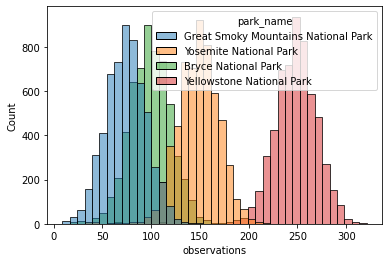

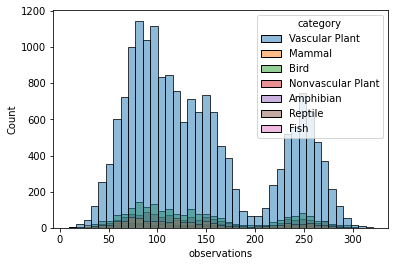

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [91]:
#check the shape of observations
#check how many entries per park
#check % of different animal categories
#check relationship between status and observations
#check relationship between status and park
#check relationship between status and animal category


sns.histplot(data=all_data, x='observations', hue='park_name')
plt.show()
plt.clf()

sns.histplot(data=all_data, x='observations', hue='category')
plt.show()
plt.clf()

plt.bar(x='park_name', height = 0.4, data=observations)
plt.show()
plt.clf()

